In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Task 1: Exploratory Data Analysis (EDA):

1.Load the dataset and perform basic data exploration.

2.Examine the distribution of features using histograms, box plots, or density plots.

3.Investigate correlations between features to understand relationships within the data.

In [2]:
df=pd.read_csv("wine.csv")
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
df.shape

(178, 14)

In [4]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [7]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
df['Magnesium'].value_counts()

Magnesium
88     13
86     11
101     9
98      9
96      8
102     7
85      6
94      6
112     6
89      5
97      5
80      5
103     5
92      5
90      4
108     4
106     4
107     4
120     3
116     3
118     3
95      3
100     3
87      3
110     3
84      3
111     3
78      3
104     3
93      2
115     2
113     2
91      2
105     2
126     1
121     1
127     1
124     1
117     1
132     1
128     1
136     1
139     1
99      1
151     1
70      1
81      1
162     1
134     1
119     1
82      1
122     1
123     1
Name: count, dtype: int64

In [9]:
df['Nonflavanoids'].value_counts()

Nonflavanoids
0.26    11
0.43    11
0.29    10
0.32     9
0.40     8
0.30     8
0.34     8
0.37     8
0.27     8
0.53     7
0.24     7
0.21     6
0.22     6
0.28     5
0.39     5
0.52     5
0.17     5
0.50     5
0.63     4
0.42     4
0.48     4
0.47     4
0.60     3
0.45     3
0.58     3
0.61     3
0.31     2
0.14     2
0.19     2
0.25     2
0.20     2
0.33     1
0.35     1
0.55     1
0.13     1
0.66     1
0.41     1
0.44     1
0.56     1
Name: count, dtype: int64

In [10]:
df['Proline'].value_counts()

Proline
680    5
520    5
630    4
750    4
625    4
      ..
685    1
470    1
740    1
835    1
840    1
Name: count, Length: 121, dtype: int64

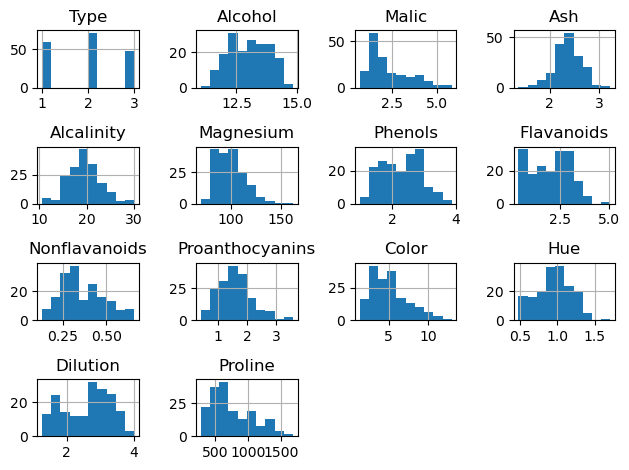

In [11]:
df.hist()
plt.tight_layout()
plt.show()

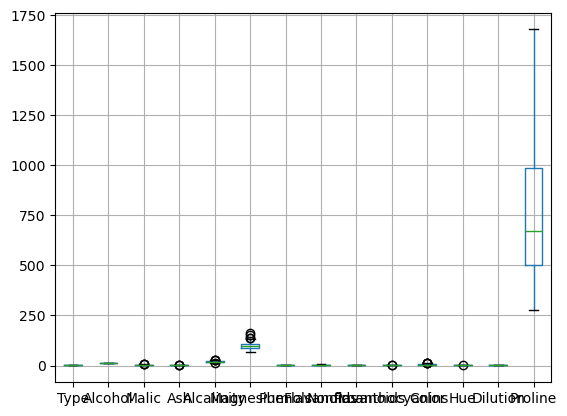

In [12]:
df.boxplot()
plt.show()

In [13]:
df.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

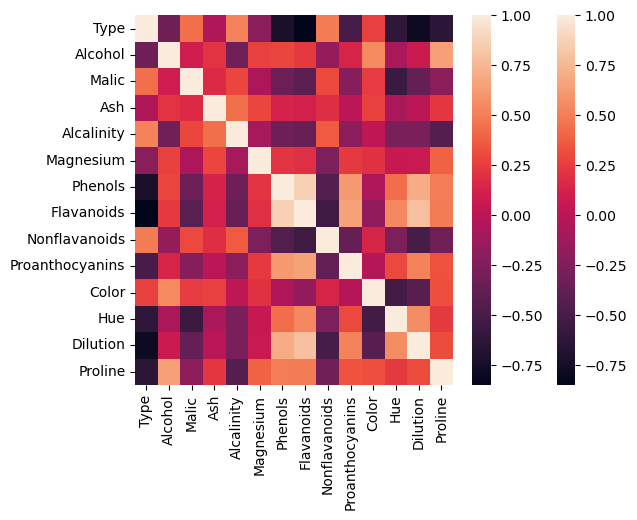

In [15]:
sns.heatmap(df.corr())
plt.show()

In [16]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### Task 2: Dimensionality Reduction with PCA:

1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3.Transform the original dataset into the principal components.

In [17]:
# scaling down the data
std = StandardScaler()

In [18]:
df_scaled = std.fit_transform(df)

In [19]:
df_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
pca=PCA()

In [22]:
pca_components = pca.fit_transform(df_scaled)

In [23]:
pca_components

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [24]:
# The amount of variance that each PCA explains is
pca.explained_variance_ # 1st column contains 5.56722458 variance .. upto 14th col contains 0.05813894 variance

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [25]:
# in percentage = the amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [26]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1   # 39   39+17=57   39+17+10=67  and so on i.e. if you stop upto 3rd column still you will get 95 %

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [27]:
# Type	  Alcohol	Malic	Ash	   Alcalinity	Magnesium	Phenols	  Flavanoids  Nonflavanoids  Proanthocyanins	Color	Hue	  Dilution	Proline
# 39.54 ﻿  57.38    67.71    74.34   80.61       85.42        89.38    91.88           93.98        95.85           97.46   98.67   99.6     100.01

In [28]:
# so by observing the per feature % values of importance we can decide for which of the columns to drop and include for better accuracy

In [29]:
pca.components_   # 14 dimensional componets

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [ 0.00569041,  0.48416087,  0.22359095,  0.31585588, -0.01161574,
         0.30055143,  0.06711983, -0.00131345,  0.0269887 ,  0.04122256,
         0.52978274, -0.27790735, -0.16277625,  0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

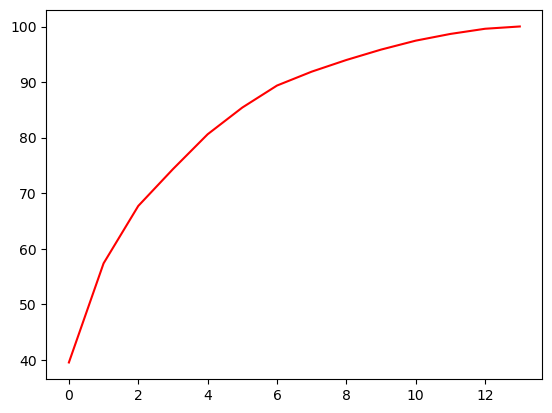

In [33]:
plt.plot(var1, color='red')
plt.show()

In [34]:
#screen plot

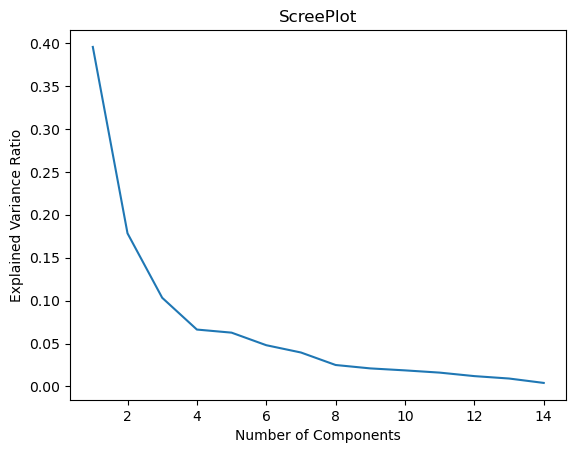

In [39]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('ScreePlot')
plt.show()

In [40]:
#cumulative explained variance

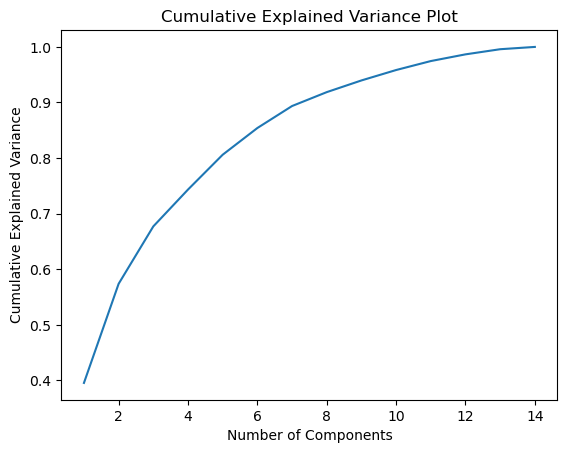

In [41]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

In [42]:
# it reduces the correlation

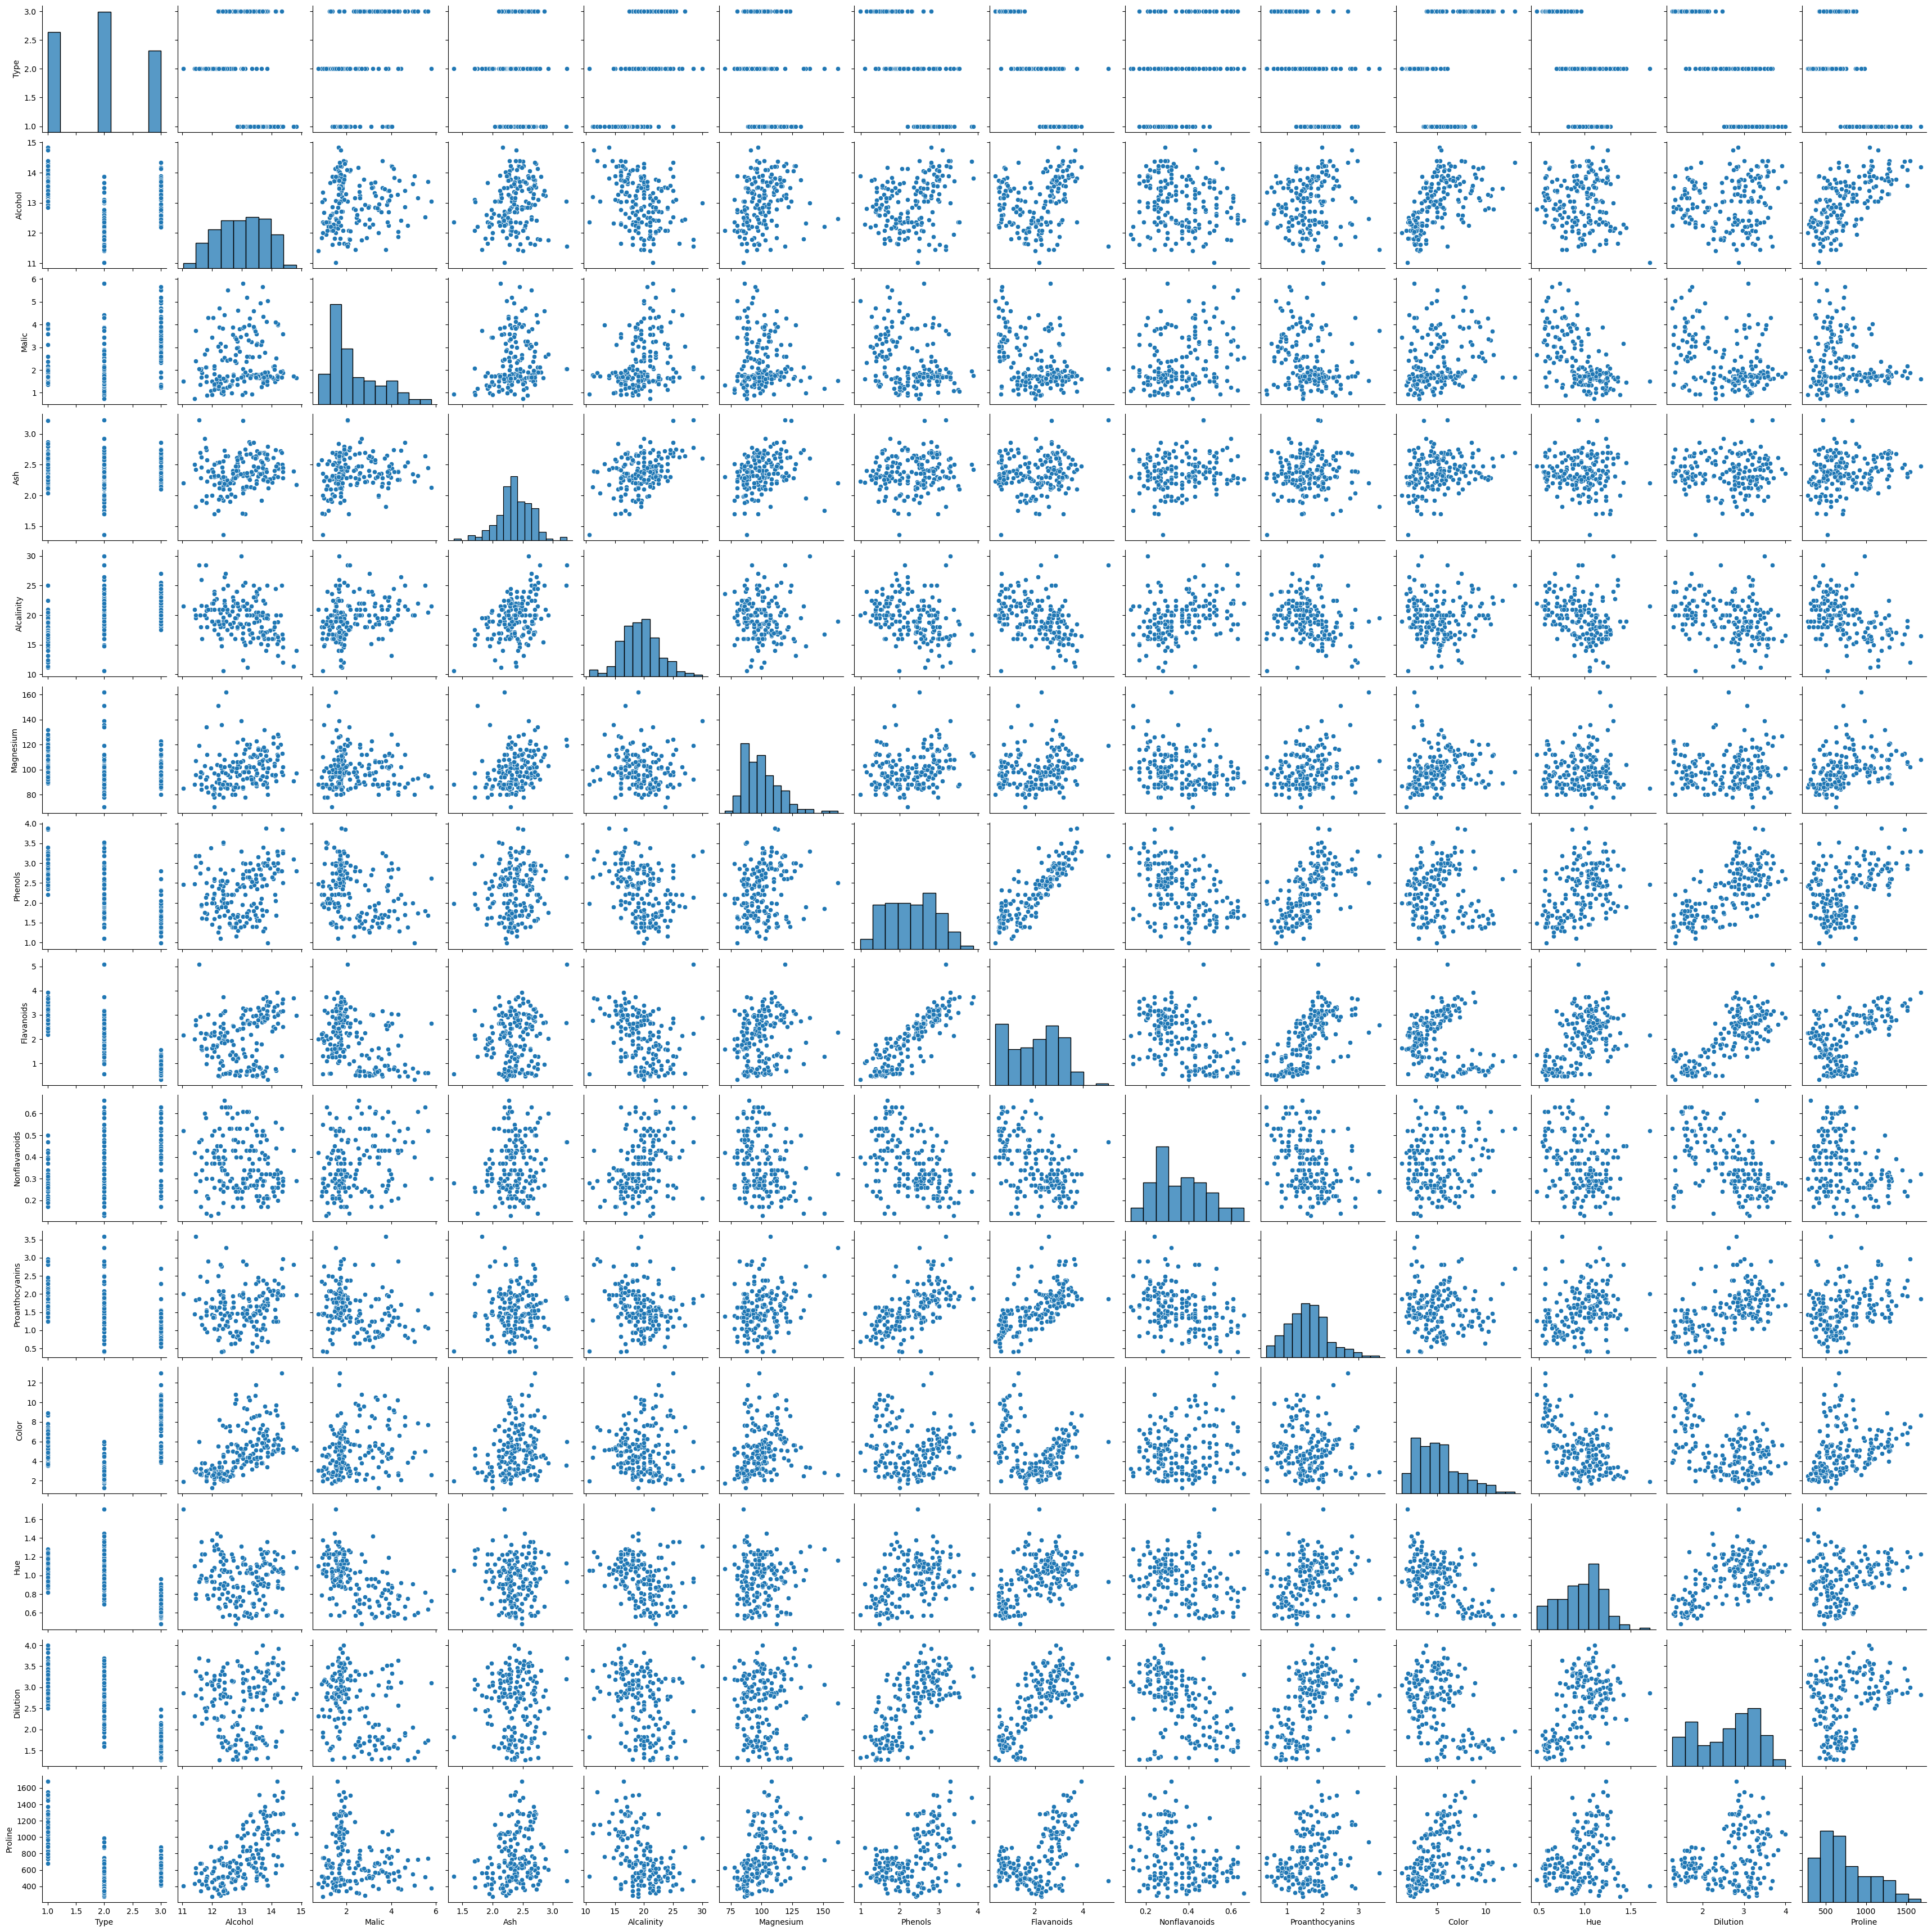

In [46]:
sns.pairplot(df)
plt.show()      # original data can check scatterplot with original dataset and see the difference

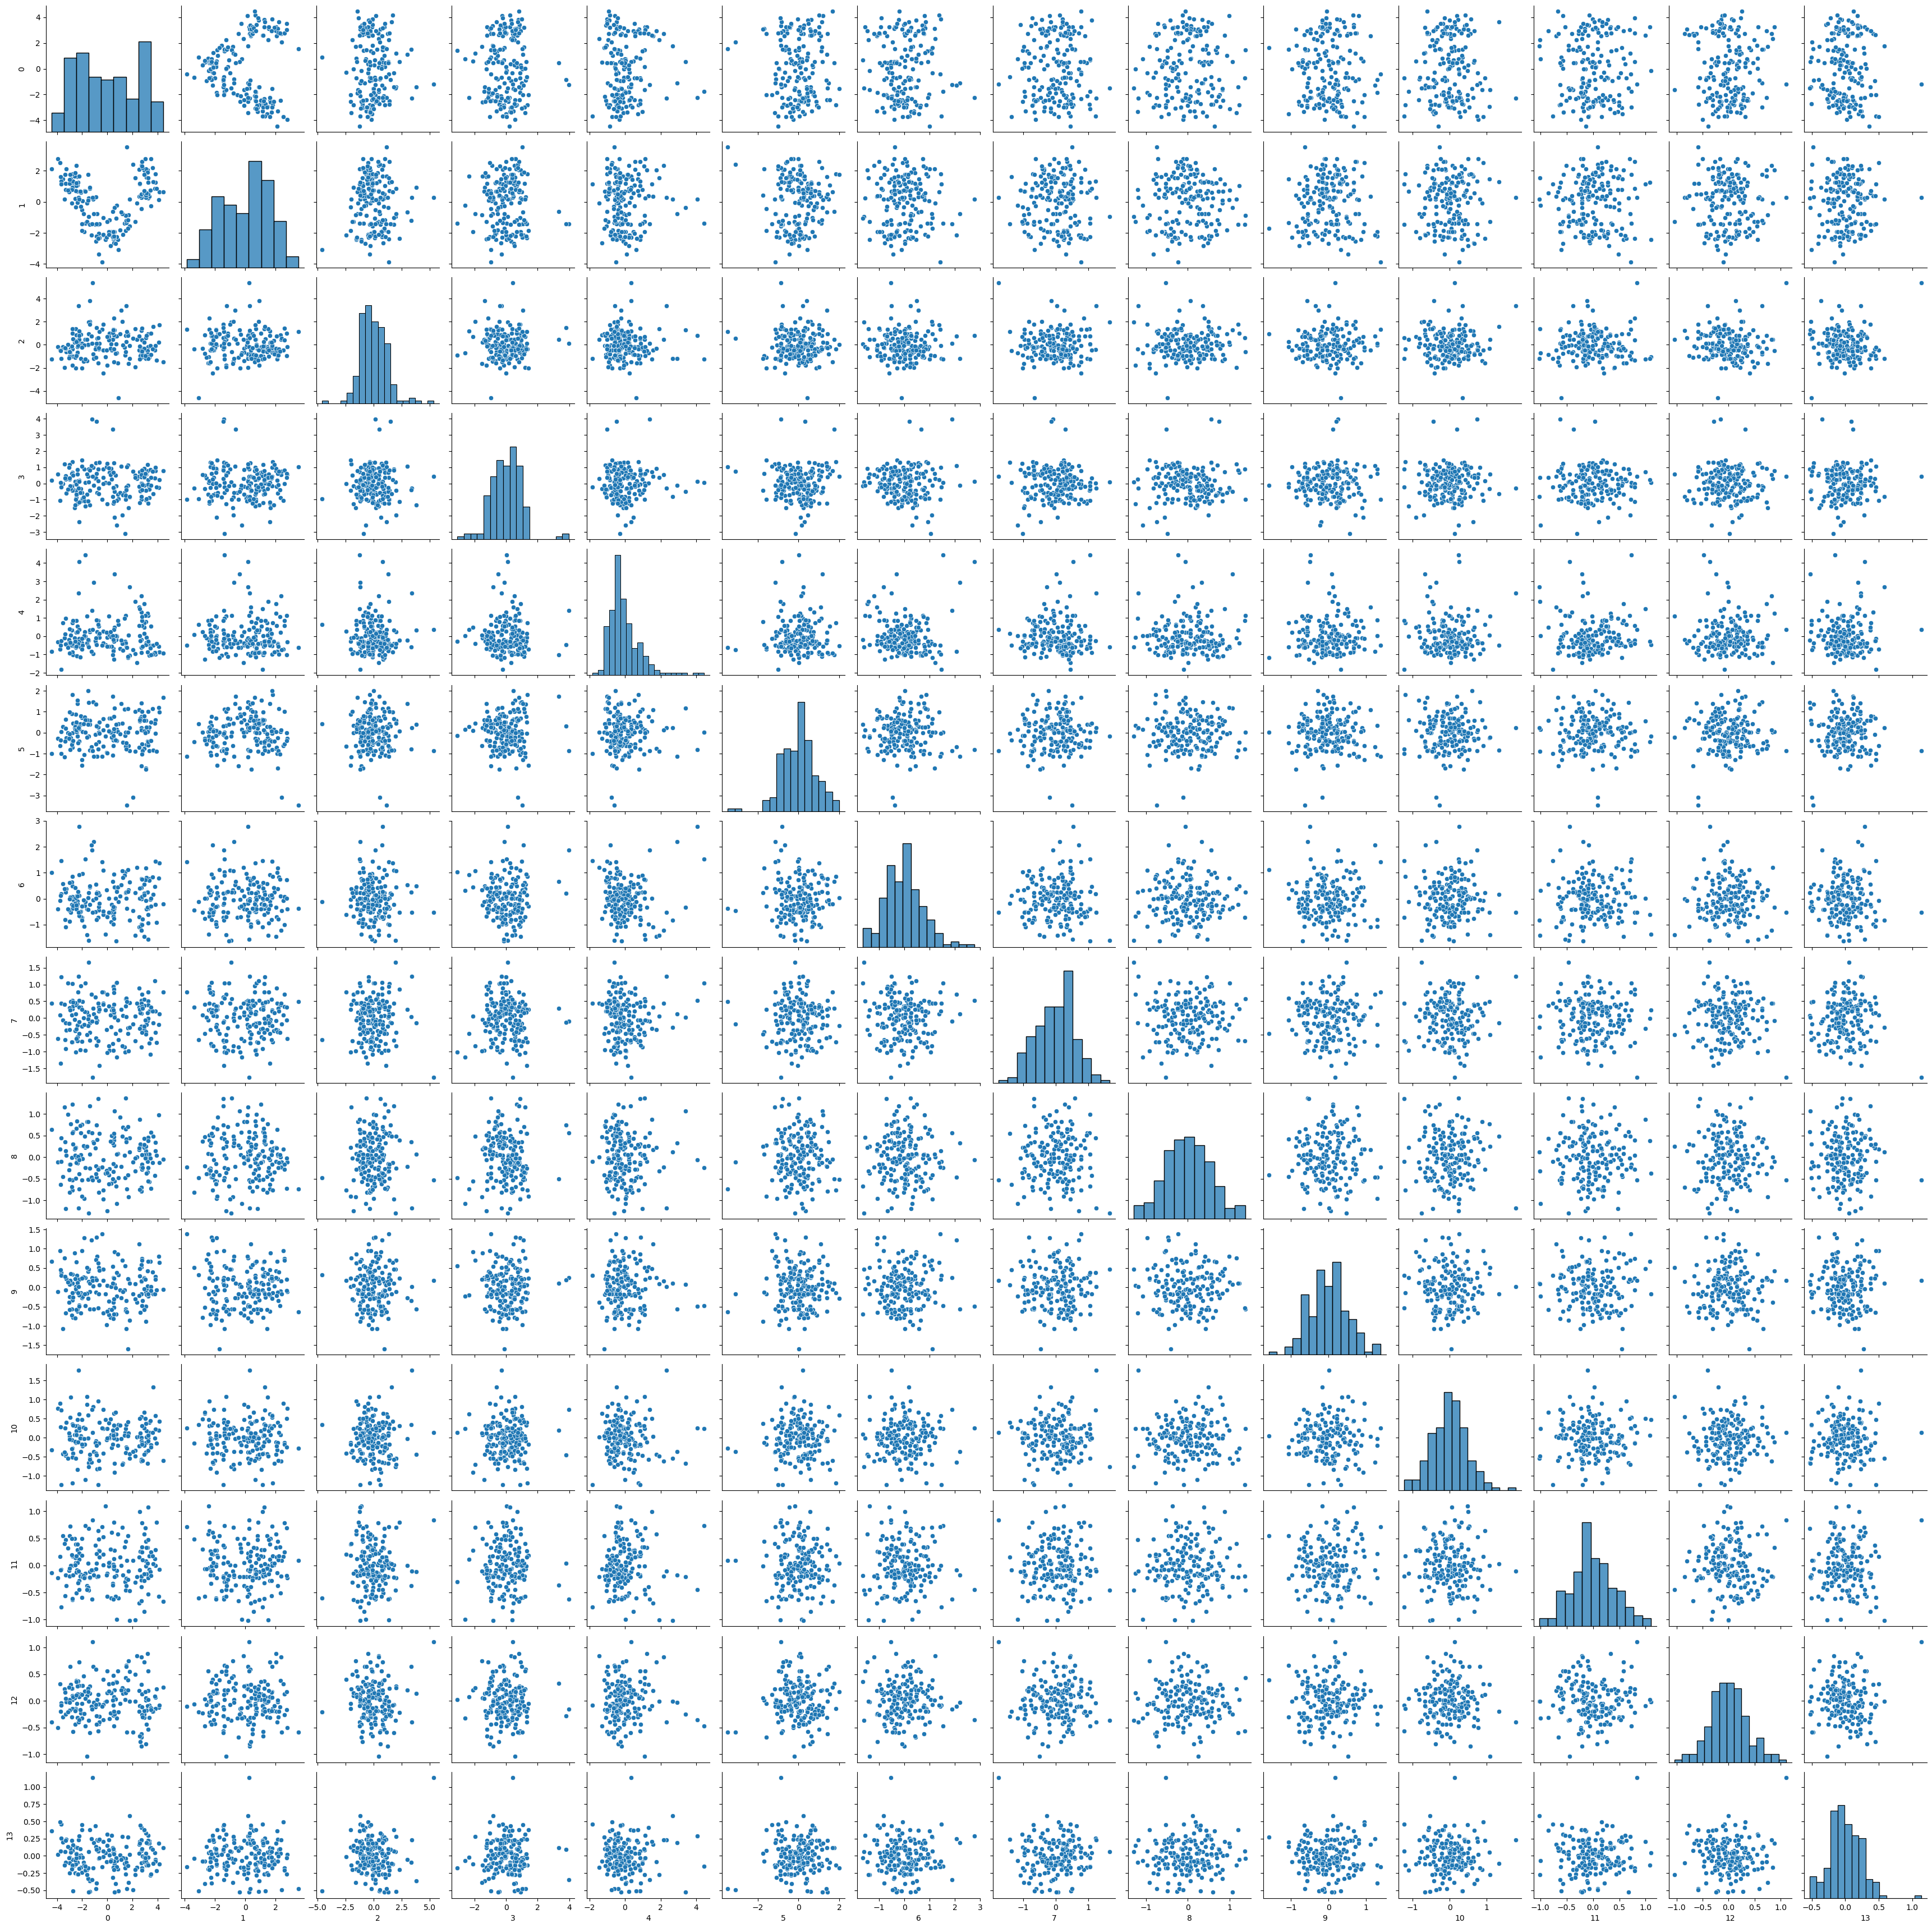

In [49]:
# Why scatterplot? - After applying PCA there should not be any correlation. Thus multicollinearity is removed or not that you can cross check.
sns.pairplot(pd.DataFrame(pca_components))
plt.show()

#### Task 3: Clustering with Original Data:

1.Apply a clustering algorithm (e.g., K-means) to the original dataset.

2.Visualize the clustering results using appropriate plot.

3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [51]:
from sklearn.cluster import KMeans

In [54]:
Kmeans = KMeans(n_clusters=3 , random_state=42)    
original = Kmeans.fit(df_scaled)

In [55]:
original

KMeans(n_clusters=3, random_state=42)

In [56]:
original_1 = Kmeans.fit_predict(df_scaled)
original_1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [57]:
original_1.sum()

np.int64(173)

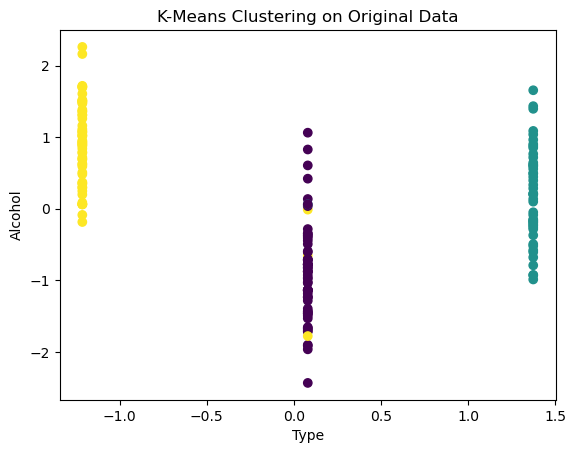

In [58]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=original.labels_, cmap='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Type')
plt.ylabel('Alcohol')
plt.show()

In [59]:
# Type	Alcohol	Malic	Ash	Alcalinity	Magnesium	Phenols	Flavanoids	Nonflavanoids	Proanthocyanins	Color	Hue	Dilution	Proline

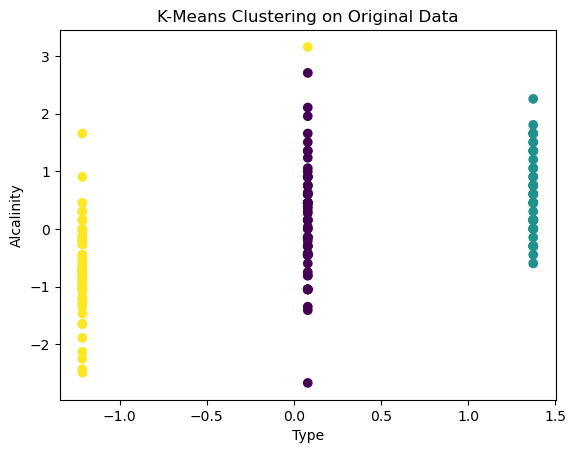

In [60]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 4], c=Kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Type')
plt.ylabel('Alcalinity')
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, Kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.30648398324833453


#### Task 4: Clustering with PCA Data:

1.Apply the same clustering algorithm to the PCA-transformed dataset.

2.Visualize the clustering results obtained from PCA-transformed data

3.Compare the clustering results from PCA-transformed data with those from the original dataset.

In [62]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_components)

KMeans(n_clusters=3, random_state=42)

In [63]:
pca_p = kmeans_pca.fit_predict(pca_components)
pca_p

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [64]:
pca_p.sum()

np.int64(173)

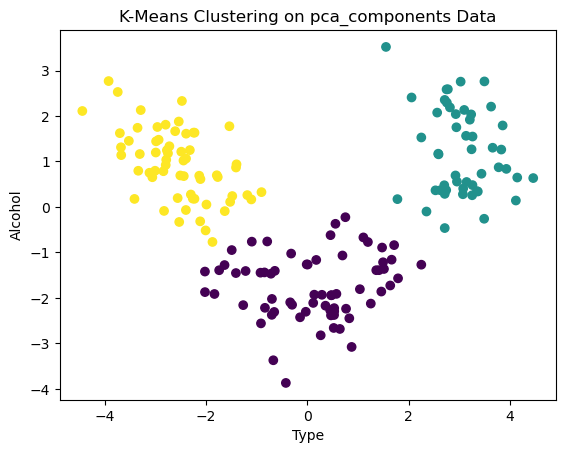

In [65]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering on pca_components Data')
plt.xlabel('Type')
plt.ylabel('Alcohol')
plt.show()

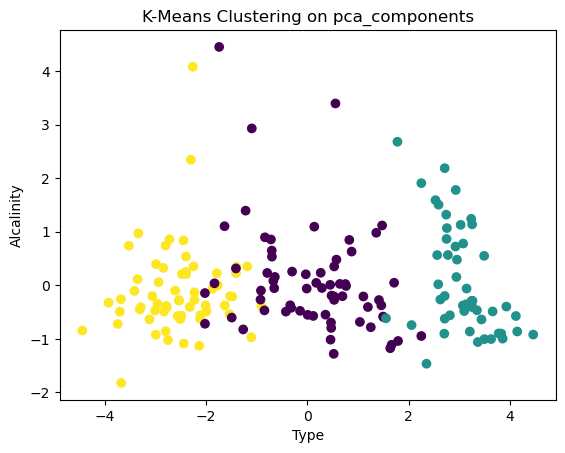

In [66]:
plt.scatter(pca_components[:, 0], pca_components[:, 4], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering on pca_components')
plt.xlabel('Type')
plt.ylabel('Alcalinity')
plt.show()

In [67]:
silhouette_avg = silhouette_score(pca_components, kmeans_pca.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30648398324833437


#### Task 5: Comparison and Analysis:

1.Compare the clustering results obtained from the original dataset and PCA-transformed data.

2.Discuss any similarities or differences observed in the clustering result.

3.Reflect on the impact of dimensionality reduction on clustering performan.

4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [68]:
pca_D = pd.DataFrame(pca_components)
pca_D

0         1         2         3         4         5         6   \
0   -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1   -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2   -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3   -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4   -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.627996  2.206617 -0.343668  0.751705 -1.004109  1.143155  0.843455   
174  2.942729  1.752263  0.207480  0.399381  0.154223  0.062465  0.139947   
175  3.027272  2.756040 -0.940803  0.607758  1.128136 -0.005290  0.733026   
176  2.755222  2.293784 -0.550474 -0.391570  1.067083 -1.012562  0.755423   
177  3.496336  2.760608  1.013151  0.349630 -1.005136 -0.377223  0.015307   

           7         8         9         10        11        12        13  
0   -0.055637 -0.458765 -1.065570 -0.420494  0.552928 -0.302978  0.200857  
1   -1.010372  0.218806  0.020182 -0.130020  0.394971 -0.146645  0.126402  
2    0.268957  1.222769  0.106249 -0.279074  0.001898  0.021278 -0.055752  
3   -0.618844 -0.114658 -0.107671  0.773866 -0.230929 -0.501277  0.019903  
4   -0.434937 -0.261548 -0.112434 -0.537931 -0.226686  0.274109 -0.517498  
..        ...       ...       ...       ...       ...       ...       ...  
173  0.206626 -0.125419  0.392619  0.136783  0.174807 -0.198803  0.093951  
174  0.565588  0.055341  0.236267  0.254286 -0.277519 -0.185064 -0.024277  
175 -0.052545 -0.027881  0.212749  0.502640  0.693336  0.167036 -0.031696  
176 -0.426512  0.048784 -0.479793  0.313786  0.344120 -0.109515  0.102823  
177  0.325002 -0.719983 -0.079908 -0.238282 -0.189866 -0.164090 -0.264917  

[178 rows x 14 columns]

In [69]:
pca_D.corr()

0             1             2             3             4   \
0   1.000000e+00 -2.120437e-16 -1.975181e-16 -9.466685e-17  3.339274e-16   
1  -2.120437e-16  1.000000e+00  3.151014e-16  1.905340e-16 -7.921510e-17   
2  -1.975181e-16  3.151014e-16  1.000000e+00  8.292031e-17  2.070820e-16   
3  -9.466685e-17  1.905340e-16  8.292031e-17  1.000000e+00 -3.494077e-16   
4   3.339274e-16 -7.921510e-17  2.070820e-16 -3.494077e-16  1.000000e+00   
5   1.040673e-16  1.280029e-16  7.208813e-17 -2.072186e-16  3.368823e-17   
6   1.729893e-17 -1.613059e-16  3.452218e-16  5.714049e-16 -4.277628e-16   
7   1.344189e-17 -6.671433e-19 -6.119207e-16 -1.292772e-16  7.129473e-16   
8   2.872090e-16  1.600013e-17  2.092982e-16 -6.203906e-16  2.220604e-16   
9   4.249455e-16  1.599146e-17 -4.115454e-16  6.395500e-16 -1.491814e-16   
10  3.291074e-17 -1.686017e-16 -1.246932e-16  1.173427e-16 -2.367796e-16   
11  1.277549e-16  1.758099e-16  3.118243e-16 -3.790256e-16  3.208849e-16   
12  4.868030e-16 -2.401463e-16 -2.709008e-16 -4.855749e-16 -1.047446e-15   
13 -1.099206e-15  2.248975e-16  1.598464e-15 -1.860142e-15  5.843032e-16   

              5             6             7             8             9   \
0   1.040673e-16  1.729893e-17  1.344189e-17  2.872090e-16  4.249455e-16   
1   1.280029e-16 -1.613059e-16 -6.671433e-19  1.600013e-17  1.599146e-17   
2   7.208813e-17  3.452218e-16 -6.119207e-16  2.092982e-16 -4.115454e-16   
3  -2.072186e-16  5.714049e-16 -1.292772e-16 -6.203906e-16  6.395500e-16   
4   3.368823e-17 -4.277628e-16  7.129473e-16  2.220604e-16 -1.491814e-16   
5   1.000000e+00  1.678993e-16 -5.317861e-17  1.401137e-16  3.053458e-16   
6   1.678993e-16  1.000000e+00  8.068418e-16  1.256917e-15  6.556041e-16   
7  -5.317861e-17  8.068418e-16  1.000000e+00 -5.239899e-16 -5.701782e-16   
8   1.401137e-16  1.256917e-15 -5.239899e-16  1.000000e+00  3.029328e-16   
9   3.053458e-16  6.556041e-16 -5.701782e-16  3.029328e-16  1.000000e+00   
10 -2.752163e-16 -3.767607e-16 -1.710334e-15  2.901946e-17  9.243708e-16   
11 -7.565367e-17  6.492170e-17 -3.504164e-16 -1.062963e-16  3.448634e-16   
12 -6.632159e-16 -9.066320e-16 -6.309774e-16  7.806440e-16 -1.299778e-15   
13  2.251770e-15 -8.264915e-16  1.006802e-15 -2.498622e-15 -9.765872e-16   

              10            11            12            13  
0   3.291074e-17  1.277549e-16  4.868030e-16 -1.099206e-15  
1  -1.686017e-16  1.758099e-16 -2.401463e-16  2.248975e-16  
2  -1.246932e-16  3.118243e-16 -2.709008e-16  1.598464e-15  
3   1.173427e-16 -3.790256e-16 -4.855749e-16 -1.860142e-15  
4  -2.367796e-16  3.208849e-16 -1.047446e-15  5.843032e-16  
5  -2.752163e-16 -7.565367e-17 -6.632159e-16  2.251770e-15  
6  -3.767607e-16  6.492170e-17 -9.066320e-16 -8.264915e-16  
7  -1.710334e-15 -3.504164e-16 -6.309774e-16  1.006802e-15  
8   2.901946e-17 -1.062963e-16  7.806440e-16 -2.498622e-15  
9   9.243708e-16  3.448634e-16 -1.299778e-15 -9.765872e-16  
10  1.000000e+00  2.749246e-16 -3.213204e-17 -2.710134e-15  
11  2.749246e-16  1.000000e+00 -4.982044e-16 -1.464037e-16  
12 -3.213204e-17 -4.982044e-16  1.000000e+00 -4.787964e-16  
13 -2.710134e-15 -1.464037e-16 -4.787964e-16  1.000000e+00

In [70]:
df_scaled_D = pd.DataFrame(df_scaled)
df_scaled_D

0         1         2         3         4         5         6   \
0   -1.213944  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997   
1   -1.213944  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648   
2   -1.213944  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997   
3   -1.213944  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446   
4   -1.213944  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997   
..        ...       ...       ...       ...       ...       ...       ...   
173  1.373864  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614   
174  1.373864  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334   
175  1.373864  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824   
176  1.373864  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684   
177  1.373864  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751   

           7         8         9         10        11        12        13  
0    1.034819 -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009  
1    0.733629 -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242  
2    1.215533 -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148  
3    1.466525 -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574  
4    0.663351  0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874  
..        ...       ...       ...       ...       ...       ...       ...  
173 -1.424900  1.274310 -0.930179  1.142811 -1.392758 -1.231206 -0.021952  
174 -1.284344  0.549108 -0.316950  0.969783 -1.129518 -1.485445  0.009893  
175 -1.344582  0.549108 -0.422075  2.224236 -1.612125 -1.485445  0.280575  
176 -1.354622  1.354888 -0.229346  1.834923 -1.568252 -1.400699  0.296498  
177 -1.274305  1.596623 -0.422075  1.791666 -1.524378 -1.428948 -0.595160  

[178 rows x 14 columns]

In [71]:
#PCA:
#Pros: Reduces dimensionality, improves visualization, and can potentially improve clustering.
#Cons: Information loss, potential for overfitting.
#Original Data:
#Pros: Retains all information.
#Cons: Computational cost, difficulty in visualization for high-dimensional data.

#### Task 6: Conclusion and Insights

1.Summarize the key findings and insights from the assignment.

2.Discuss the practical implications of using PCA and clustering in data analysis.

3.Provide recommendations for when to use each technique based on the analysis conducted.


In [72]:
#1. Compare Clustering Results:

#Visual Comparison: Visually inspect the scatter plots to see if the clusters are well-separated and distinct in both cases. , so from above we can get the difference in mapping
#Silhouette Score Comparison: A higher silhouette score indicates better-defined cluster. both PCA and original data have almost same score  :- 0.3064839832483344

In [73]:
#Discuss Similarities and Differences:

#Similarities: Both clustering approaches might identify similar underlying patterns in the data.
#Differences: PCA can help in reducing noise and improving cluster separation, especially in high-dimensional datasets. However, it might also lead to some information loss.

In [74]:
#Impact of Dimensionality Reduction:

#Advantages:
#Improved visualization: Lower-dimensional data is easier to visualize.
#Reduced computational cost: Clustering on fewer dimensions is faster.
#Potential for better clustering: Noise reduction can improve clustering accuracy.
#Disadvantages:
#Information loss: Some information might be lost during the dimensionality reduction process.

In [75]:
#  impact of PCA on clustering performance is that it reduces the data complexity , and also the coreelations between them 
#  the optimal number of clusters are shown by sctter plot as 3 clusters , as compared to original scled data , the clusters are not really identified
#  there is no difference in the silhoutte score for both the data 
# by applying the pca for the main purpose of dimensionality reduction , it shows the percentage for including the number of features , the features which gives less difference in percentage can be droped 


In [76]:
#PCA:
#Pros: Reduces dimensionality, improves visualization, and can potentially improve clustering.
#Cons: Information loss, potential for overfitting.
#Original Data:
#Pros: Retains all information.
#Cons: Computational cost, difficulty in visualization for high-dimensional data.

In [ ]:
#If the dataset is high-dimensional and visualization is challenging, PCA can be a useful tool to reduce dimensionality and improve interpretability.
#If preserving all information is crucial, direct clustering on the original data might be preferred.
#Experiment with different numbers of principal components to find the optimal balance between dimensionality reduction and information preservation.